## Downloading the Data + PIP Installs

Data is already downloaded and provided in the repository, but it needs to be unzipped.

In [ ]:
import platform
import sys
mysystem = platform.system()

if mysystem != 'Windows':
    !unzip ../../Data/hotelReservations.zip
    !{sys.executable} -m pip install pandas --user
    !{sys.executable} -m pip install numpy --user
    !{sys.executable} -m pip install seaborn --user
    !{sys.executable} -m pip install sklearn --user
    !{sys.executable} -m pip install tensorflow --user
else:
    print('For windows, manually unzip the data and install pandas, numpy, seaborn, sklearn, and tensorflow')

## Imports 

Here we include import statements and needed libraries to perform this assignment.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

## Preprocessing Used for Second Model

In [ ]:
df = pd.read_csv('./hotel_bookings.csv')
df = df.drop(columns=['country', 'agent', 'company', 'reservation_status_date', 'reservation_status'])
df = df.replace(np.nan, 0)

from sklearn.preprocessing import MinMaxScaler

norm_scaler = MinMaxScaler()
numericalAttribs = ['lead_time', 
                    'stays_in_week_nights', 
                    'stays_in_weekend_nights', 
                    'adults',
                    'children',
                    'babies',
                    'previous_cancellations',
                    'previous_bookings_not_canceled',
                    'booking_changes',
                    'days_in_waiting_list',
                    'adr',
                    'total_of_special_requests']

df[numericalAttribs] = norm_scaler.fit_transform(df[numericalAttribs])

categoricalAttribs = ['hotel',
                      'arrival_date_month',
                      'arrival_date_year',
                      'arrival_date_week_number',
                      'arrival_date_day_of_month',
                      'meal',
                      'market_segment',
                      'distribution_channel',
                      'is_repeated_guest',
                      'reserved_room_type',
                      'assigned_room_type',
                      'deposit_type',
                      'customer_type',
                      'required_car_parking_spaces']

encodings = {}
for a in categoricalAttribs:
    keys = {}
    iter = 0
    for val in list(df[a].unique()):
        keys[val] = iter
        iter += 1
    encodings[a] = keys

df = df.replace(encodings)

## Building Second Model

The first model we used was an ANN. From there, we branched off to other types of methods and models to see if we could obtain better accuracy. 

After all the tests, we have come to realize that the ANN was the best option with a SVM model coming very close to the ANN's performance.

Here is the second ANN we tried to use.

In [5]:
from sklearn.model_selection import train_test_split 
Train, Test = train_test_split(df, test_size=0.3)

X_train = Train.drop('is_canceled', axis = 1)
X_test = Test.drop('is_canceled', axis = 1)

y_train = Train['is_canceled']
y_test = Test['is_canceled']

display(X_train, X_test, y_train, y_test)

hotel  lead_time  arrival_date_year  arrival_date_month  \
83308       1   0.021710                  1                   6   
34669       0   0.012212                  2                   8   
105228      1   0.090909                  2                   6   
33927       0   0.021710                  2                   8   
7614        0   0.172320                  1                   1   
...       ...        ...                ...                 ...   
48117       1   0.101764                  1                   8   
16430       0   0.084125                  0                   1   
78779       1   0.000000                  0                   3   
33109       0   0.000000                  2                   7   
88733       1   0.017639                  1                  10   

        arrival_date_week_number  arrival_date_day_of_month  \
83308                         31                         26   
34669                         39                         29   
105228                        31                         29   
33927                         36                          4   
7614                           7                         15   
...                          ...                        ...   
48117                         38                         16   
16430                          8                         23   
78779                         15                         13   
33109                         33                         13   
88733                         46                          8   

        stays_in_weekend_nights  stays_in_week_nights    adults  children  \
83308                  0.000000                  0.02  0.036364       0.0   
34669                  0.000000                  0.04  0.018182       0.0   
105228                 0.052632                  0.06  0.036364       0.0   
33927                  0.105263                  0.00  0.036364       0.0   
7614                   0.105263                  0.14  0.036364       0.1   
...                         ...                   ...       ...       ...   
48117                  0.052632                  0.06  0.036364       0.0   
16430                  0.052632                  0.08  0.036364       0.2   
78779                  0.000000                  0.04  0.036364       0.0   
33109                  0.000000                  0.02  0.036364       0.0   
88733                  0.052632                  0.04  0.018182       0.0   

        ...  previous_bookings_not_canceled  reserved_room_type  \
83308   ...                             0.0                   1   
34669   ...                             0.0                   1   
105228  ...                             0.0                   1   
33927   ...                             0.0                   2   
7614    ...                             0.0                   2   
...     ...                             ...                 ...   
48117   ...                             0.0                   1   
16430   ...                             0.0                   0   
78779   ...                             0.0                   3   
33109   ...                             0.0                   2   
88733   ...                             0.0                   1   

        assigned_room_type  booking_changes  deposit_type  \
83308                    1         0.000000             0   
34669                    1         0.000000             0   
105228                   1         0.000000             0   
33927                    5         0.000000             0   
7614                     2         0.095238             0   
...                    ...              ...           ...   
48117                    1         0.000000             2   
16430                    0         0.000000             0   
78779                    3         0.000000             0   
33109                    2         0.000000             0   
88733                    1         0.000000  

hotel  lead_time  arrival_date_year  arrival_date_month  \
110904      1   0.005427                  2                  10   
19793       0   0.004071                  1                   6   
65070       1   0.100407                  2                   8   
56504       1   0.578019                  1                   2   
67754       1   0.147897                  2                  10   
...       ...        ...                ...                 ...   
49895       1   0.366350                  1                   9   
116087      1   0.561737                  2                   0   
5305        0   0.194030                  1                   9   
17327       0   0.131615                  0                   2   
56856       1   0.587517                  1                   2   

        arrival_date_week_number  arrival_date_day_of_month  \
110904                        44                          1   
19793                         27                          1   
65070                         38                         22   
56504                         10                          7   
67754                         44                          5   
...                          ...                        ...   
49895                         43                         19   
116087                         1                         12   
5305                          44                         23   
17327                         13                         27   
56856                         11                         14   

        stays_in_weekend_nights  stays_in_week_nights    adults  children  \
110904                 0.000000                  0.04  0.018182       0.0   
19793                  0.000000                  0.02  0.018182       0.0   
65070                  0.052632                  0.06  0.054545       0.0   
56504                  0.000000                  0.04  0.036364       0.0   
67754                  0.105263                  0.04  0.036364       0.0   
...                         ...                   ...       ...       ...   
49895                  0.000000                  0.08  0.018182       0.0   
116087                 0.000000                  0.04  0.036364       0.0   
5305                   0.105263                  0.04  0.036364       0.0   
17327                  0.105263                  0.10  0.036364       0.0   
56856                  0.000000                  0.04  0.036364       0.0   

        ...  previous_bookings_not_canceled  reserved_room_type  \
110904  ...                             0.0                   1   
19793   ...                             0.0                   1   
65070   ...                             0.0                   3   
56504   ...                             0.0                   1   
67754   ...                             0.0                   1   
...     ...                             ...                 ...   
49895   ...                             0.0                   1   
116087  ...                             0.0                   1   
5305    ...                             0.0                   1   
17327   ...                             0.0                   2   
56856   ...                             0.0                   1   

        assigned_room_type  booking_changes  deposit_type  \
110904                   1         0.047619             0   
19793                    1         0.000000             0   
65070                    3         0.000000             0   
56504                    1         0.000000             2   
67754                    1         0.000000             0   
...                    ...              ...           ...   
49895                    1         0.047619             0   
116087                   1         0.000000             0   
5305                     1         0.000000             2   
17327                    2         0.000000             0   
56856                    1         0.000000  

83308     0
34669     0
105228    0
33927     0
7614      1
         ..
48117     1
16430     0
78779     0
33109     0
88733     0
Name: is_canceled, Length: 83573, dtype: int64

110904    0
19793     0
65070     1
56504     1
67754     1
         ..
49895     0
116087    0
5305      1
17327     0
56856     1
Name: is_canceled, Length: 35817, dtype: int64

In [7]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() 

model.add(Dense(units = 50, activation = 'relu', input_dim = 26))
model.add(Dense(units = 35, activation = 'softmax'))
model.add(Dense(units = 35, activation = 'softmax'))
model.add(Dense(units = 20, activation = 'tanh'))
model.add(Dense(units = 20, activation = 'tanh'))
model.add(Dense(units = 10, activation = 'tanh'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')
model.fit(X_train.astype('float'), y_train, batch_size = 1, epochs = 100)

Epoch 1/100
83573/83573 [==============================] - 47s 553us/step - loss: 0.5369
Epoch 2/100
83573/83573 [==============================] - 45s 538us/step - loss: 0.5297
Epoch 3/100
83573/83573 [==============================] - 46s 547us/step - loss: 0.5285
Epoch 4/100
83573/83573 [==============================] - 45s 543us/step - loss: 0.5319
Epoch 5/100
83573/83573 [==============================] - 46s 547us/step - loss: 0.5296
Epoch 6/100
83573/83573 [==============================] - 46s 555us/step - loss: 0.5227
Epoch 7/100
83573/83573 [==============================] - 46s 546us/step - loss: 0.5214
Epoch 8/100
83573/83573 [==============================] - 46s 552us/step - loss: 0.5211
Epoch 9/100
83573/83573 [==============================] - 47s 557us/step - loss: 0.5201
Epoch 10/100
83573/83573 [==============================] - 49s 587us/step - loss: 0.5170
Epoch 11/100
83573/83573 [==============================] - 48s 577us/step - loss: 0.5145
Epoch 12/100
83573/

In [9]:
from sklearn.metrics import classification_report

yhat_train_model = model.predict(X_train.astype(float))
yhat_train_model = [1 if y>=0.5 else 0 for y in yhat_train_model]
yhat_test_model = model.predict(X_test.astype(float))
yhat_test_model = [1 if y>=0.5 else 0 for y in yhat_test_model]

print(classification_report(y_train, yhat_train_model))
print(classification_report(y_test, yhat_test_model))

1120/1120 [==============================] - 0s 429us/step
              precision    recall  f1-score   support

           0       0.76      0.95      0.85     52523
           1       0.85      0.50      0.63     31050

    accuracy                           0.78     83573
   macro avg       0.81      0.73      0.74     83573
weighted avg       0.79      0.78      0.77     83573

              precision    recall  f1-score   support

           0       0.76      0.94      0.85     22643
           1       0.84      0.50      0.63     13174

    accuracy                           0.78     35817
   macro avg       0.80      0.72      0.74     35817
weighted avg       0.79      0.78      0.76     35817



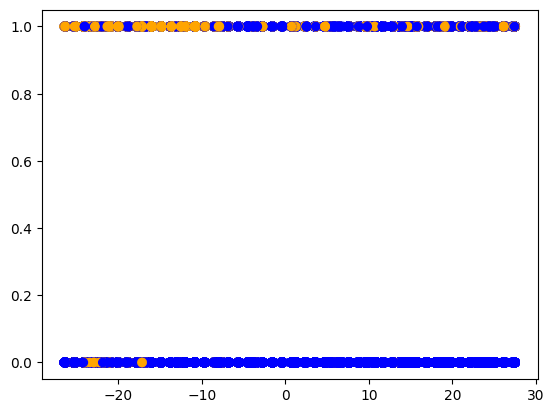

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=1)
pca.fit(X_train)
X_test_final = pca.transform(X_test)
X_test_final = pd.DataFrame(X_test_final)
X_test_final = X_test_final[0]

colors = []
for i in range(len(yhat_test_model)):
    if yhat_test_model[i] == 0: 
        colors.append("blue")
    elif yhat_test_model[i] == 1: 
        colors.append("orange")

plt.scatter(X_test_final, y_test, color=colors)

#### Results

As shown, even adding more dense layers to the neural network did not significantly increase performance even over 100 epochs.

#### SVM

The model that performed close to the ANN that we found was an SVM. Here are the results for a linear and rbf SVM.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm_lin = SVC(kernel = 'linear')
svm_lin.fit(X_train, y_train)
yhat_test_lin = svm_lin.predict(X_test)
print(classification_report(y_test, yhat_test_lin))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84     22403
           1       0.99      0.39      0.55     13414

    accuracy                           0.77     35817
   macro avg       0.86      0.69      0.70     35817
weighted avg       0.83      0.77      0.74     35817



In [ ]:
colors = []
for i in range(len(yhat_test_model)):
    if yhat_test_model[i] == 0: 
        colors.append("blue")
    elif yhat_test_model[i] == 1: 
        colors.append("orange")

plt.scatter(X_test_final, y_test, color=colors)


NOTE: Plots were lost somehow when saved. They can be viewed on the README.md file from the main directory.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm_rbf = SVC(kernel = 'rbf')
svm_rbf.fit(X_train, y_train)
yhat_test_rbf = svm_rbf.predict(X_test)
print(classification_report(y_test, yhat_test_rbf))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83     22403
           1       0.99      0.34      0.50     13414

    accuracy                           0.75     35817
   macro avg       0.85      0.67      0.67     35817
weighted avg       0.82      0.75      0.71     35817



In [ ]:
colors = []
for i in range(len(yhat_test_model)):
    if yhat_test_model[i] == 0: 
        colors.append("blue")
    elif yhat_test_model[i] == 1: 
        colors.append("orange")

plt.scatter(X_test_final, y_test, color=colors)

NOTE: Plots were lost somehow when saved. They can be viewed on the README.md file from the main directory.